In [1]:
from tqdm import tqdm_notebook
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import io, exposure, color, img_as_float, img_as_int, img_as_uint, img_as_ubyte

In [8]:
#Number of iterates
def num_iterates_quadratic(z, c, n=50, d=0):
    R = max(2, abs(c))
    for i in range(n):
        if abs(z) > R:
            return i+1
        z = z**2+c
    return 0

#Matrix of number of iterates
def get_matrix(c, n=50, res=100, xlims=None, ylims=None, d=0):
    if xlims is None and ylims is None:
        out = np.zeros((res, res))
        R = max(2, abs(c))
        R = 1.5
        x = np.linspace(-R, R, num=res)
        y = np.linspace(-R, R, num=res)
    else:
        dx = abs(xlims[0] - xlims[1])
        dy = abs(ylims[0] - ylims[1])
        if dx>dy:
            res_x = res
            res_y = int(res*dy/dx)
        else:
            res_y = res
            res_x = int(res*dx/dy)
        y = np.linspace(xlims[0], xlims[1], num=res_x)
        x = np.linspace(ylims[0], ylims[1], num=res_y)
        out = np.zeros((res_y, res_x))
    y = np.flip(y)
            
    for a in tqdm_notebook(range(len(x))):
        for b in range(len(y)):
            out[b, a] = num_iterates_quadratic(x[a] + 1j*y[b], c, n=n, d=d)
    return out
    

In [9]:
#Color functions
def p_red(x, n=400):
    x = 1. - 4*(x-n/4)/n
    x[x==2] = 0.
    x[x>1] = 1.
    x[x<0] = 0.
    
    return x
    
def p_green(x, n=400):
    x = - 16*x*(x-n)/(3*n*n)
    x[x>1] = 1.
    x[x<0] = 0.
    return x

    
def p_blue(x, n=400):
    x = 4*(x-n/2)/n
    x[x>1] = 1.
    x[x<0] = 0.
    return x

    
def colouring(a):
    n, m = a.shape
    n_max = np.max(a)
    new = np.zeros((n, m, 3))
    new[...,0] = p_red(a, n=n_max)
    new[...,1] = p_green(a, n=n_max)
    new[...,2] = p_blue(a, n=n_max)
    return new

C:\Users\marti\Anaconda3\lib\site-packages\skimage\util\dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


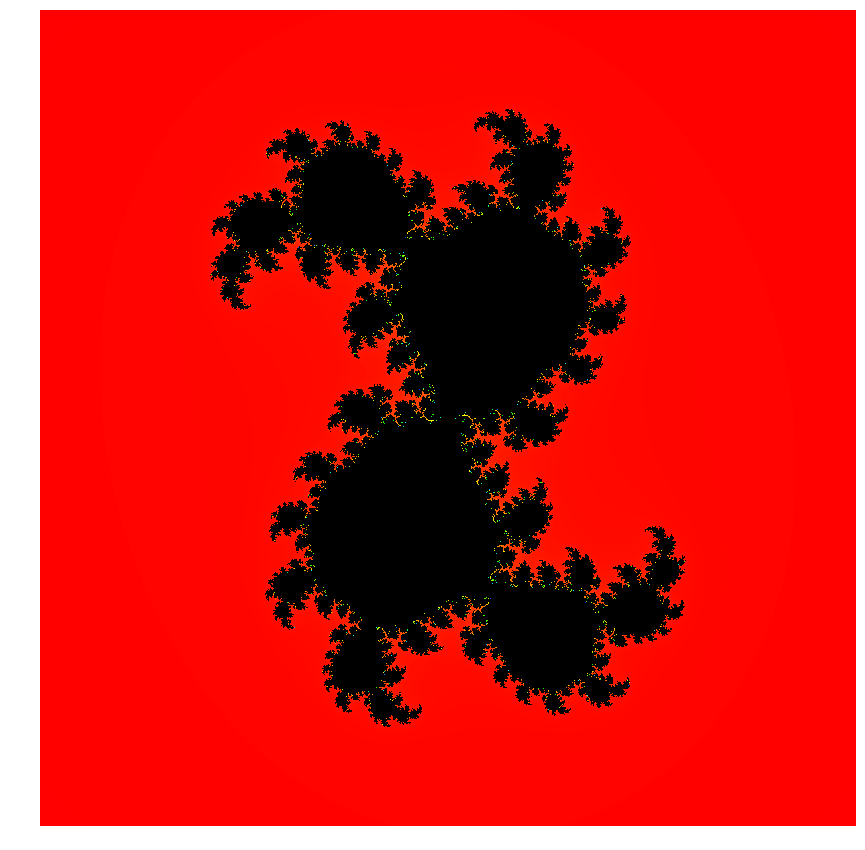

In [11]:
angle = (1./(2*np.pi))
c = (2*np.exp(2*np.pi*angle*1j) - np.exp(4*np.pi*angle*1j))/4
#c=complex(0.3742, 0.1934)



name = 'siegel_md.png'
gscale = get_matrix(c, n=1000, res=2048)
#write_mat_to_file('julia_-1.75.txt', gscale)
img = colouring(gscale)
io.imsave(name, img)
plt.figure(figsize = (15, 15))
plt.axis('off')
plt.imshow(img)
plt.show()